In [2]:
from prettytable import PrettyTable
from Datos import *
from Clasificador import *
from EstrategiaParticionado import *

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
data_titanic = Datos("ConjuntoDatos/titanic.csv")
data_tic_tac_toe = Datos("ConjuntoDatos/tic-tac-toe.csv")
data = {"titanic": data_titanic, "tic-tac-toe": data_tic_tac_toe}

epocas = [100, 200]
tam_poblacion = [50, 150]
vs = ValidacionSimple(0.30, 10)

for k in data:
    error = []
    for t in tam_poblacion:
        error_in = []
        for e in epocas:
            agen = AlgoritmoGenetico(t, e)
            error_in.append(agen.validacion(vs, data[k]))
        error.append(error_in)
    t = PrettyTable()
    t.add_row([k, "Epocas", " "])
    t.add_row(["Tamaño", "100", "200"])
    t.add_row(["50", "{:.4%}".format(error[0][0]), "{:.4%}".format(error[0][1])])
    t.add_row(["100", "{:.4%}".format(error[1][0]), "{:.4%}".format(error[1][1])])
    print(t)

Comenzando entrenamiento:


Epoca 4: 	Acierto medio = 0.6035	 Acierto Max = 0.6644

Epoca 9: 	Acierto medio = 0.6274	 Acierto Max = 0.7149

Epoca 14: 	Acierto medio = 0.6701	 Acierto Max = 0.7394

Epoca 19: 	Acierto medio = 0.6810	 Acierto Max = 0.7408

Epoca 24: 	Acierto medio = 0.7022	 Acierto Max = 0.7653

Epoca 29: 	Acierto medio = 0.7269	 Acierto Max = 0.7653

Epoca 34: 	Acierto medio = 0.7291	 Acierto Max = 0.7653

Epoca 39: 	Acierto medio = 0.7395	 Acierto Max = 0.7667

Epoca 44: 	Acierto medio = 0.7476	 Acierto Max = 0.7694

Epoca 49: 	Acierto medio = 0.7519	 Acierto Max = 0.7694

Epoca 54: 	Acierto medio = 0.7566	 Acierto Max = 0.7694

Epoca 59: 	Acierto medio = 0.7542	 Acierto Max = 0.7694

Epoca 64: 	Acierto medio = 0.7604	 Acierto Max = 0.7694

Epoca 69: 	Acierto medio = 0.7628	 Acierto Max = 0.7694

Epoca 74: 	Acierto medio = 0.7521	 Acierto Max = 0.7694

Epoca 79: 	Acierto medio = 0.7605	 Acierto Max = 0.7694

Epoca 84: 	Acierto medio = 0.7591	 Acierto Max = 0.7694

Epoca

## Análisis ROC

Comenzando entrenamiento:


Epoca 4: 	Acierto medio = 0.6743	 Acierto Max = 0.7544

Epoca 9: 	Acierto medio = 0.7263	 Acierto Max = 0.7858

Epoca 14: 	Acierto medio = 0.7516	 Acierto Max = 0.7913

Epoca 19: 	Acierto medio = 0.7669	 Acierto Max = 0.7913

Epoca 24: 	Acierto medio = 0.7756	 Acierto Max = 0.7913

Epoca 29: 	Acierto medio = 0.7779	 Acierto Max = 0.7913

Epoca 34: 	Acierto medio = 0.7781	 Acierto Max = 0.7913

Epoca 39: 	Acierto medio = 0.7800	 Acierto Max = 0.7913

Epoca 44: 	Acierto medio = 0.7778	 Acierto Max = 0.7913

Epoca 49: 	Acierto medio = 0.7841	 Acierto Max = 0.7913

Epoca 54: 	Acierto medio = 0.7860	 Acierto Max = 0.7913

Epoca 59: 	Acierto medio = 0.7856	 Acierto Max = 0.7913

Epoca 64: 	Acierto medio = 0.7805	 Acierto Max = 0.7913

Epoca 69: 	Acierto medio = 0.7875	 Acierto Max = 0.7913

Epoca 74: 	Acierto medio = 0.7839	 Acierto Max = 0.7913

Epoca 79: 	Acierto medio = 0.7839	 Acierto Max = 0.7913

Epoca 84: 	Acierto medio = 0.7852	 Acierto Max = 0.7913

Epoca

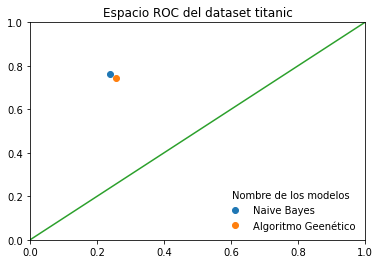

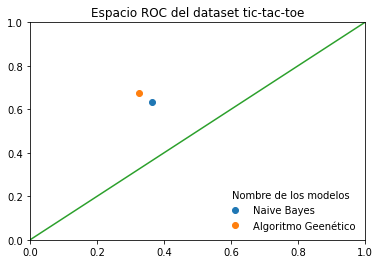

In [5]:
import matplotlib.pyplot as plt

titanic = Datos('./ConjuntoDatos/titanic.csv')
tic_tac_toe = Datos('./ConjuntoDatos/tic-tac-toe.csv')
iteraciones = 50

datasets = {'titanic': titanic, 'tic-tac-toe': tic_tac_toe}
# Validacion simple con 10 iteraciones
vs = ValidacionSimple(0.30, 1)

alge = AlgoritmoGenetico(100, 200)
nb = ClasificadorNaiveBayes()

clasificadores = {"Naive Bayes":nb, "Algoritmo Geenético":alge}

for (k_dataset, v_dataset) in datasets.items():
    for (k_clasificador, v_clasificador) in clasificadores.items():
        ROCpoint = np.array([0, 0])
        for i in range(iteraciones):
            ROCpoint = ROCpoint + np.array(v_clasificador.espacioROC(particionado=vs, dataset=v_dataset))
        plt.plot(ROCpoint[1]/iteraciones,ROCpoint[0]/iteraciones, 'o', label=k_clasificador)
    plt.title("Espacio ROC del dataset "+k_dataset)
    plt.plot(np.linspace(0, 1, 5), np.linspace(0, 1, 5))
    plt.legend(loc="lower right", title="Nombre de los modelos", frameon=False)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.show()

## Apartado 1
#### a) Población inicial
Nuestra implementación generará individuos con tantas reglas como valores nominales por campo haya.
Esto quiere decir, que si los campos furan {C1: s/n, C2: a/b/c, C3: g/h/i/j} se crearían cadenas de 9 bits,
representando cada bit un valor.
De esta forma para ese ejemplo, un individuo posible sería [1, 0, 1, 0, 0, 1, 1, 1, 0]

#### b) Mecanismo de cruce
El mecanismo aplicado es cruce en un punto, donde el índice de mínimo es 0 y el máx es len - 2.
El índice se escoge aleatoriamente en cada nuevo cruce y se aplica a los progenitores, devolviendo los dos individuos
resultantes del cruce.

#### c) Mecanismo Mutación
En este caso la mutación recorrerá de forma iterativa todos los individuos de la población, pero solo se aplicará si el
número aleatorio generado es menor que 0.05. Es decir, aproximadamente mutarán un 5% de los individuos. Los individuos
que muten recibirán un cambio de bit {0 por 1, o 1 por 0} sobre un bit escogido de forma aleatoria.

#### d) Clasificación
Vista la generación de reglas del aparatado 1 a), hay que explicar como se aplican ests reglas. Básicamente, se iterará
sobre todos los individuos viendo cual de las reglas actuales obtiene más precisión. De esta forma iremos generando
reglas que consigan mayor fitness y por tanto mejoren la clasificación. Finalmente escogeremosla mejor regla de la
última época de entrenamiento y la utilizaremos para clasificar. Para clasificar utilizando una regla, se ve si el valor
del indivíduo a evaluar está a 1 en la regla, en ese caso, se dará el campo como válido. Se hace esto mismo para todos
los campos de tal manera que los indivíduos válidos tendrán tantos bits a 1 como campos haya.

## Apartado 2

#### Titanic
En el dataset del titanic el mejor inivíduo obtenido ha sido el:

[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Esto se puede interpretar fácilmente si separamos por campos:

In [ ]:
|  Pclas  |Gender|                     Age                       |
[ 1, 1, 1 | 1, 0 | 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Y para interpretar la regla basta con utilizar un indiviuo cualquiera como ejemplo:

{Pclas: 2, Gender: Male, Age: 7}

Lo primero es transformar a cadena de bits el individuo, obteniendo:

In [ ]:
|  Pclas  |Gender|                     Age                       |
[ 0, 1, 0 | 0, 1 | 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

Hay que destacar que los valores de los campos se ordenan de menor a mayor. Para aplicar la regla es simplemente aplicar
un AND lógico entre los bits campo a campo y después ver si el número total de bits a 1 es igual al número de campos.
Por ejemplo:

Pclas: 1, 1, 1 AND 0, 1, 0 : 0, 1, 0    -- Se satisface
Gender:  1, 0 AND 0, 1 : 0, 0           -- No se satisface
Age: Como todo son 1 en la regla siempre se satisface

Como podemos ver este individuo se predice que no sobrevivirá debido a que solo dos campos de 3 satisfacen la regla.
El significado de la regla obtenida en este dataset es que las mujeres sobrevivirán y los hombres no.

La tabla obtenida en el al correr las poblaciones es la siguiente:

In [ ]:
+---------+----------+----------+
| Field 1 | Field 2  | Field 3  |
+---------+----------+----------+
| titanic |  Epocas  |          |
|  Tamaño |   100    |   200    |
|    50   | 21.6613% | 22.3003% |
|   100   | 22.0447% | 21.2141% |
+---------+----------+----------+

#### Tic-tac-toe

En el caso del tic-tac-toe, el mejor indivíduo se el siguiente:

In [ ]:
| TLeftSq | TMidSq | TRightSq | MLeftSq | MMidSq | MRightSq | BLeftSq | BMidSq | BRightSq |
[ 1, 1, 1 | 1, 1, 1|  1, 1, 1 | 1, 1, 1 | 1, 0, 1|  1, 1, 1 | 1, 1, 1 | 1, 1, 1|  1, 1, 1 ]

En este caso implica que si hay una 'o' en la casilla MMidSq se clasifica como 'Negative, y como
'positive en caso contrario.

La tabla resultante es la siguiente.


In [ ]:
+-------------+----------+----------+
|   Field 1   | Field 2  | Field 3  |
+-------------+----------+----------+
| tic-tac-toe |  Epocas  |          |
|    Tamaño   |   100    |   200    |
|      50     | 31.7073% | 29.1986% |
|     100     | 29.8955% | 29.4425% |
+-------------+----------+----------+

## Apartado 3
Las tablas obtenidas no nos llevan a sacar conclusiones finales sobre el tamaño de la porblación o
sobre el número de epocas debido a que vemos que el error no disminuye necesariamente al aumentar las épocas
o el tamaño. En nuestro caso hemos observado que subiendo la tasa de elitismo del 5% al 10% las reglas hacían
convergencia muy rápido y se dejaban de generar nuevas reglas. Por tanto lo hemos mantenido al 5%. El cruce solamente se
ha probado en un solo punto. Y la mutación se ha subido desde un 1% inicial hasta un 5% también para disminuir la
convergencia de las reglas.

## Apartado 4

Se puede ver en la evolución del los entrenamientos como mejoran tanto el fitness medio como el fitness máximo.

## Apartado 5
Los gráficos ROC se encuentran encima del apartado 1.